In [1]:
import numpy as np
from functools import reduce
from operator import add
from scipy import stats
from random import randint
import matplotlib.pyplot as plt

In [2]:
!ls

 data  'IR_metrics_bootstrapping. Васильев Семён.ipynb'


In [3]:
def read_data(file_name):
    res = []
    with open(file_name, 'r') as f:
        for line in f:
            res.append(list(map(int, line.split())))
    return res

In [4]:
f1_name = 'data/c1.txt'
f2_name = 'data/c2.txt' 

In [5]:
data1 = read_data(f1_name)
data2 = read_data(f2_name)

In [6]:
def count_CTR(data, step=1000):
    res = []
    for i in range(0, len(data), step):
        res.append(
            reduce(
                add,
                map(
                    lambda arr: int(1 in arr), 
                    data[i: i+step])
            ) / step
        )
    return res

In [7]:
def count_clicks_in_top(data, step=1000):
    res = []
    for i in range(0, len(data), step):
        res.append(
            reduce(
                add,
                map(
                    lambda arr: int(arr[0] == 1), 
                    data[i: i+step])
            ) / step
        )
    return res

In [8]:
CTR1 = count_CTR(data1)
CTR2 = count_CTR(data2)

In [9]:
clicks_in_top1 = count_clicks_in_top(data1)
clicks_in_top2 = count_clicks_in_top(data2)

In [10]:
ITER_NUM = 1000
count_CTR = 0
count_clicks_in_top = 0
for i in range(ITER_NUM):
    samp_CTR1, samp_CTR2 = [], []
    samp_clicks_in_top1, samp_clicks_in_top2 = [], []
    for j in range(len(CTR1)):
        samp_CTR1.append(CTR1[randint(0, len(CTR1)-1)])
        samp_CTR2.append(CTR2[randint(0, len(CTR2)-1)])
        samp_clicks_in_top1.append(clicks_in_top1[randint(0, len(clicks_in_top1)-1)])
        samp_clicks_in_top2.append(clicks_in_top2[randint(0, len(clicks_in_top2)-1)])
    if stats.ttest_ind(samp_CTR1, samp_CTR2).pvalue < 0.05:
        count_CTR += 1
    if stats.ttest_ind(samp_clicks_in_top1, samp_clicks_in_top2).pvalue < 0.05:
        count_clicks_in_top += 1
print(f"ASL CTR: {count_CTR / ITER_NUM}")
print(f"ASL clicks_in_top: {count_clicks_in_top / ITER_NUM}")

ASL CTR: 1.0
ASL clicks_in_top: 1.0


In [11]:
def window_mean(data, size=50):
    res = []
    for i in range(0, len(data)):
        res.append(np.mean(data[i: i+size]))
    return res

In [12]:
mean_CTR1 = window_mean(CTR1, size=10)
mean_CTR2 = window_mean(CTR2, size=10)

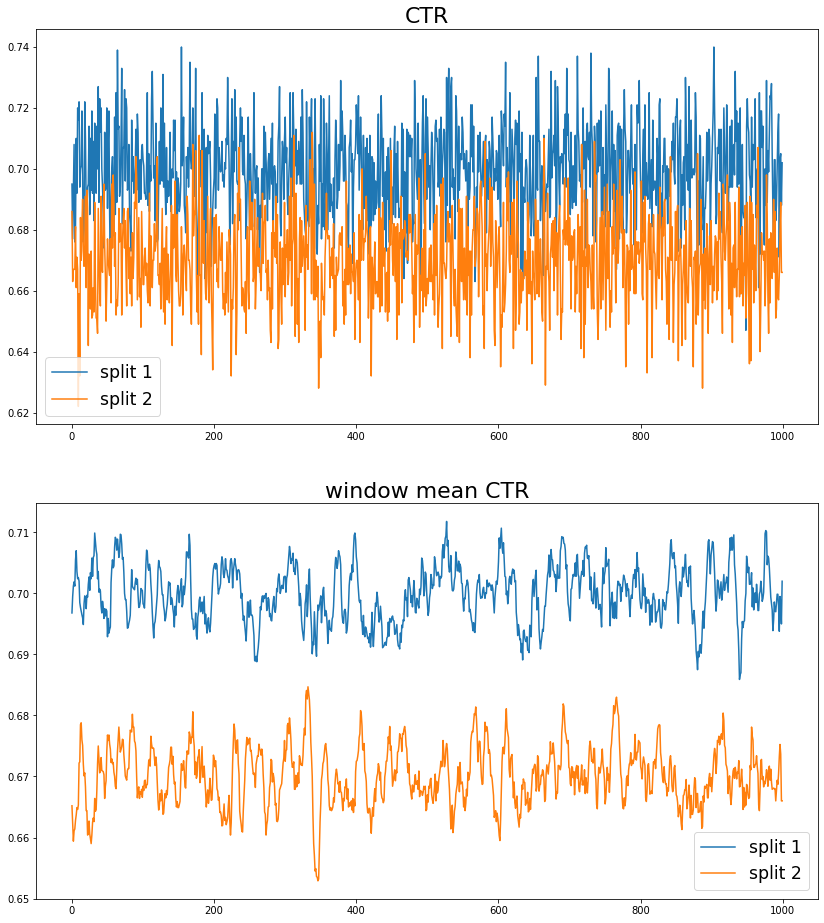

In [13]:
fig = plt.figure(figsize=(14, 16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title(
    'CTR', 
    fontdict={
        'fontsize': 22
    }
)
ax1.plot(CTR1, label='split 1')
ax1.plot(CTR2, label='split 2')
ax1.legend(fontsize='xx-large')

ax2.set_title(
    'window mean CTR', 
    fontdict={
        'fontsize': 22
    }
)
ax2.plot(mean_CTR1, label='split 1')
ax2.plot(mean_CTR2, label='split 2')
ax2.legend(fontsize='xx-large')

In [14]:
mean_clicks_in_top1 = window_mean(clicks_in_top1, size=10)
mean_clicks_in_top2 = window_mean(clicks_in_top2, size=10)

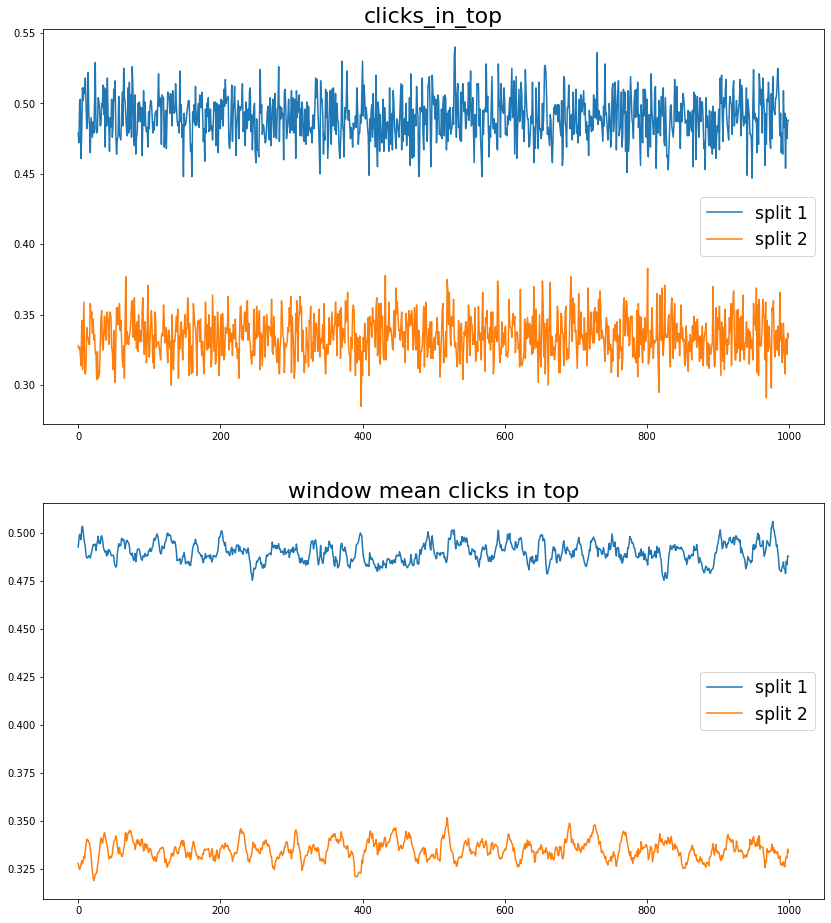

In [15]:
fig = plt.figure(figsize=(14, 16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title(
    'clicks_in_top', 
    fontdict={
        'fontsize': 22
    }
)
ax1.plot(clicks_in_top1, label='split 1')
ax1.plot(clicks_in_top2, label='split 2')
ax1.legend(fontsize='xx-large')

ax2.set_title(
    'window mean clicks in top', 
    fontdict={
        'fontsize': 22
    }
)
ax2.plot(mean_clicks_in_top1, label='split 1')
ax2.plot(mean_clicks_in_top2, label='split 2')
ax2.legend(fontsize='xx-large')

### Вывод:

t-критерий в 100% экспериментов отвеграет гипотезу о равенстве распределений значений метрик. По графикам видно, что у обеих метрик значения на втором сплите меньше, чем на первом. Это говорит о том, что качество поиска на втором сплите хуже.